# Understanding of regression model for implementation in medical insurance chain 
In the notebook we try to find the highest relation w.r.t attribute of cost and others.
1. Multi-Linear-regression
2. Linea-regression
3. Polynomial-regression

## Multi-linear-regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
Data = pd.read_csv("../input/multilinearwrtmedicalinsurances/insurance.csv")

In [3]:
Data.sort_values(by=['age'], inplace=True)
Data['sex'] = Data['sex'].replace('female',0)#0 is female
Data['sex'] = Data['sex'].replace('male',1)#1 is male
Data['smoker'] = Data['smoker'].replace('no',0)#0 is No
Data['smoker'] = Data['smoker'].replace('yes',1)#1 is yes
Data['region'] = Data['region'].replace('southeast',1)
Data['region'] = Data['region'].replace('southwest',2)
Data['region'] = Data['region'].replace('northeast',3)
Data['region'] = Data['region'].replace('northwest',4)
print(Data)

      age  sex     bmi  children  smoker  region      charges
1248   18    0  39.820         0       0       1   1633.96180
482    18    0  31.350         0       0       1   1622.18850
492    18    0  25.080         0       0       3   2196.47320
525    18    0  33.880         0       0       1  11482.63485
529    18    1  25.460         0       0       3   1708.00140
...   ...  ...     ...       ...     ...     ...          ...
398    64    1  25.600         2       0       2  14988.43200
335    64    1  34.500         0       0       2  13822.80300
378    64    0  30.115         3       0       4  16455.70785
1265   64    1  23.760         0       1       1  26926.51440
635    64    1  38.190         0       0       3  14410.93210

[1338 rows x 7 columns]


In [4]:
y = Data.iloc[:, -1].values

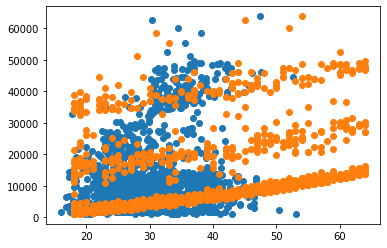

In [5]:
plt.scatter(Data['bmi'],y)
plt.scatter(Data['age'],y)#age is a much liner model

In [6]:
x = Data.iloc[:, 0:-1].values
y = y.reshape(len(y),1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(x_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [10]:
reg.score(x_test, y_test)

0.7948868927221111

In [11]:
x_test=np. ravel(x_test)
y_pred=np. ravel(y_pred)

In [12]:
x_test.shape

(2010,)

In [13]:
y_pred.shape

(335,)

## Linear-regression 
Taking only one variable linear model smoking have high similarity with the data in hand

In [14]:
x1 = Data.iloc[:, 4:-2].values

In [15]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1_train, y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(x1_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [18]:
reg.score(x1_test, y_test)

0.6488013359015306

In [19]:
x2 = Data.iloc[:, 0:-6].values
x2 = np. ravel(x2)

In [20]:
y1 = Data.iloc[:, -1].values
y1 = np.ravel(y1)

## Polynomial-regression
observing the best possible fit for the data

In [21]:
mymodel = np.poly1d(np.polyfit(x2, y1, 3))

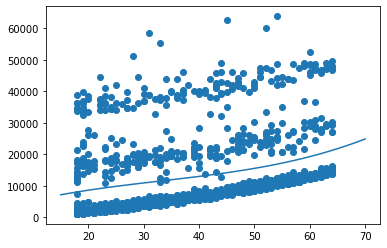

In [22]:
myline = np.linspace(15, 70, 35)

plt.scatter(x2,y1)
plt.plot(myline, mymodel(myline))

plt.show()
#as age increases the charge also increases 